### Value Iteration

价值迭代在每一次遍历后即刻停止策略评估（对每个状态进行一次更新）。价值迭代有效结合了策略评估的遍历策略改进的遍历。

对任意$s \in S$，更新公式为

$$v_{k+1}(s) = \max_a \mathbb{E} [R_{t+1} + \gamma v_k (S_{k+1}) | S_t = s, A_t = a]$$

即

$$v_{k+1}(s) = \max_a \sum_{s', r} p (s', r | s, a)[r + \gamma v_k (s')]$$

可以证明，对于任意$v_0$，在$v_*$存在的条件下，序列$\left\{ v_k \right\}$都可以收敛到$v_*$。

### Example 4.3: Gambler’s Problem

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of 100 dollars, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite MDP. The state is the gambler’s capital, $s \in \left\{ 1, 2, ... , 99 \right\}$ and the actions are stakes, $a \in \left\{ 0, 1, ... , \min (s, 100 -s) \right\}$. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1. The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let $p_h$ denote the probability of the coin coming up heads. If ph is known, then the entire problem is known and it can be solved, for instance, by value iteration.

![](images/03-03-value-iteration.png)

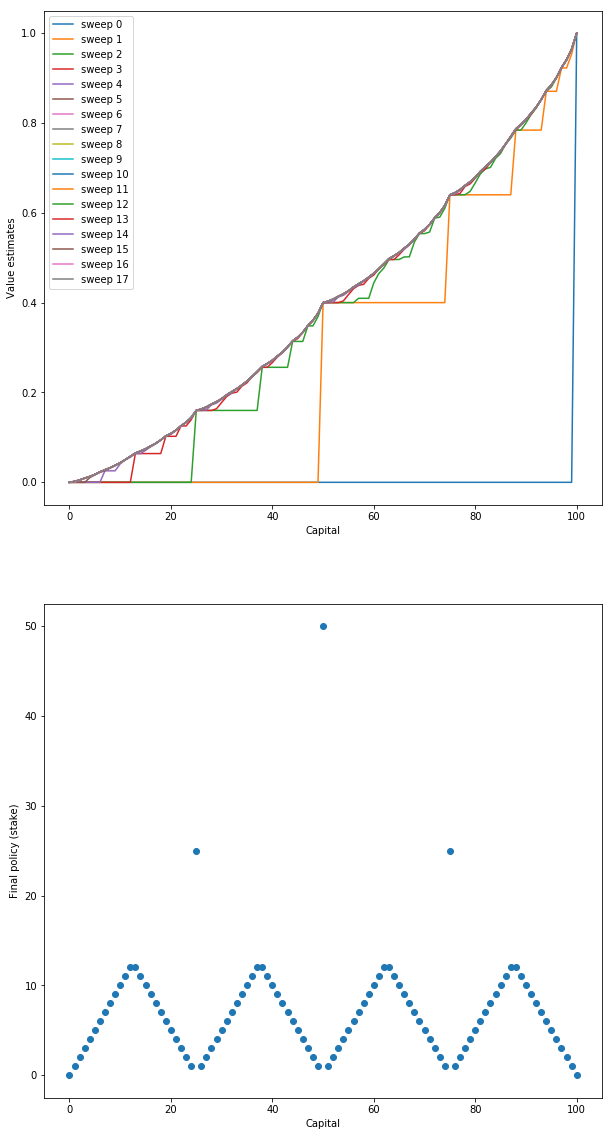

In [4]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# goal
GOAL = 100

# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)

# probability of head
HEAD_PROB = 0.4


def figure_4_3():
    # state value
    state_value = np.zeros(GOAL + 1)
    state_value[GOAL] = 1.0

    sweeps_history = []

    # value iteration
    while True:
        old_state_value = state_value.copy()
        sweeps_history.append(old_state_value)

        for state in STATES[1:GOAL]:
            # get possilbe actions for current state
            actions = np.arange(min(state, GOAL - state) + 1)
            action_returns = []
            for action in actions:
                action_returns.append(
                    HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])
            new_value = np.max(action_returns)
            state_value[state] = new_value
        delta = abs(state_value - old_state_value).max()
        if delta < 1e-9:
            sweeps_history.append(state_value)
            break

    # compute the optimal policy
    policy = np.zeros(GOAL + 1)
    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(
                HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])

        # round to resemble the figure in the book, see
        # https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/issues/83
        policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]

    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    for sweep, state_value in enumerate(sweeps_history):
        plt.plot(state_value, label='sweep {}'.format(sweep))
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')

    plt.subplot(2, 1, 2)
    plt.scatter(STATES, policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')

    plt.show()

if __name__ == '__main__':
    figure_4_3()


**在这个实例中，仅以到达100时作为奖赏，好处是：价值即成功概率。**

### 异步动态规划

无需对所有状态遍历，可以：
- 结合实时交互；
- 试着通过选择一些特定状态来更新，从而加快算法速度。

### 广义策略迭代

![](images/03-04-generalized-policy-iteration.png)

### 动态规划的效率

动态规划的效率其实是很理想的（多项式的）。